### NASA Mars News
Scrape the NASA Mars News Site and collect the latest News Title and Paragraph Text. Assign the text to variables that you can reference later.

In [20]:
# Import BeautifulSoup
from bs4 import BeautifulSoup
# Import Splinter and set the chromedriver path
from splinter import Browser
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser("chrome", **executable_path, headless=False)

# Visit the NASA Mars News Site URL
nasa_url = "https://mars.nasa.gov/news"
browser.visit(nasa_url)

In [6]:
# Scrape the browser into soup and use soup to find and print 
# the latest News Title and Paragraph Text
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
news_title = soup.find("div", class_="content_title").text
news_p = soup.find("div", class_="article_teaser_body").text 
print(news_title)
print(news_p)

### JPL Mars Space Images - Featured Image

1. Visit the url for JPL Featured Space Image here.
2. Use splinter to navigate the site and find the image url for the current Featured Mars Image and assign the url string to a variable called featured_image_url.
3. Make sure to find the image url to the full size .jpg image.
4. Make sure to save a complete url string for this image

In [8]:
# set the chromedriver path
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser("chrome", **executable_path, headless=False)

# Visit the JPL Mars Space Images URL
jpl_url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
browser.visit(jpl_url)

In [9]:
# Scrape the browser into soup and use soup to find the image url
html_2 = browser.html
soup_2 = BeautifulSoup(html_2, 'html.parser')

image_url_parts = soup_2.find("article", class_="carousel_item")["style"]
image_url_parts = image_url_parts.split("'")[1]

featured_image_url = "https://www.jpl.nasa.gov" + image_url_parts
featured_image_url

### Mars Weather
Visit the Mars Weather twitter account here and scrape the latest Mars weather tweet from the page. Save the tweet text for the weather report as a variable called mars_weather.

In [13]:
# set the chromedriver path
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser("chrome", **executable_path, headless=False)

# Visit the Mars weather twitter URL
twitter_url = "https://twitter.com/marswxreport?lang=en"
browser.visit(twitter_url)

# Scrape the browser into soup and use soup to find the latest Mars weather
html_3 = browser.html
soup_3 = BeautifulSoup(html_3, 'html.parser')

mars_weather = soup_3.find("p", class_="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text").text
mars_weather

### Mars Facts
Visit the Mars Facts webpage here and use Pandas to scrape the table containing facts about the planet including Diameter, Mass, etc.
Use Pandas to convert the data to a HTML table string.

In [39]:
import pandas as pd
mars_facts_url = 'https://space-facts.com/mars/'

In [40]:
tables = pd.read_html(mars_facts_url)
tables

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.42 x 10^23 kg (10.7% Earth)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.52 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                  -153 to 20 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers]

In [41]:
df = tables[0]
df.columns = ['Property', 'Value']
#df.set_index()
df

,Property,Value
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.42 x 10^23 kg (10.7% Earth)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.52 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-153 to 20 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [42]:
# Convert the data to a HTML table string.
html_table = df.to_html().replace('\n', '')
html_table

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Property</th>      <th>Value</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>Equatorial Diameter:</td>      <td>6,792 km</td>    </tr>    <tr>      <th>1</th>      <td>Polar Diameter:</td>      <td>6,752 km</td>    </tr>    <tr>      <th>2</th>      <td>Mass:</td>      <td>6.42 x 10^23 kg (10.7% Earth)</td>    </tr>    <tr>      <th>3</th>      <td>Moons:</td>      <td>2 (Phobos &amp; Deimos)</td>    </tr>    <tr>      <th>4</th>      <td>Orbit Distance:</td>      <td>227,943,824 km (1.52 AU)</td>    </tr>    <tr>      <th>5</th>      <td>Orbit Period:</td>      <td>687 days (1.9 years)</td>    </tr>    <tr>      <th>6</th>      <td>Surface Temperature:</td>      <td>-153 to 20 °C</td>    </tr>    <tr>      <th>7</th>      <td>First Record:</td>      <td>2nd millennium BC</td>    </tr>    <tr>      <th>8</th>      <td>Recorded By:</td>      <td>Egyptian astronomer

In [43]:
# Save the table directly to a HTML file.
html_table = df.to_html('table.html')

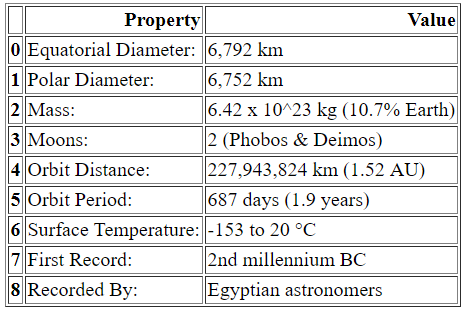

### Mars Hemispheres
1. Visit the USGS Astrogeology site here to obtain high resolution images for each of Mar's hemispheres.
2. You will need to click each of the links to the hemispheres in order to find the image url to the full resolution image.
3. Save both the image url string for the full resolution hemisphere image, and the Hemisphere title containing the hemisphere name. Use a Python dictionary to store the data using the keys img_url and title.
4. Append the dictionary with the image url string and the hemisphere title to a list. This list will contain one dictionary for each hemisphere.

In [48]:
# setup counter
counter = [0, 1, 2, 3]

# setup empty list to store data
hemisphere_image_urls = []

for x in counter:
    executable_path = {'executable_path': 'chromedriver.exe'}
    browser = Browser("chrome", **executable_path, headless=False)
    
    # Visit the following URL
    url = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
    browser.visit(url)
    
    # Design an XPATH selector to grab the img
    xpath = '//div//a[@class="itemLink product-item"]/img' 

    # Use splinter to Click the each img
    results = browser.find_by_xpath(xpath)
    results[x].click()
    
    # Scrape page into Soup
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    
    # Get the imgage title
    title = soup.find("h2", class_="title").text
    print(title)
    
    # Get the imgage url
    img_url_parts = soup.find("img", class_="wide-image")["src"]
    img_url = "https://astrogeology.usgs.gov" + img_url_parts
    print(img_url)
    
    # Store data in the list as dictionary
    hemisphere_image_urls.append ({
        "title": title,
        "img_url": img_url
    })
    # Close the browser after scraping
    browser.quit()   

hemisphere_image_urls

Cerberus Hemisphere Enhanced
https://astrogeology.usgs.gov/cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg
Schiaparelli Hemisphere Enhanced
https://astrogeology.usgs.gov/cache/images/3cdd1cbf5e0813bba925c9030d13b62e_schiaparelli_enhanced.tif_full.jpg
Syrtis Major Hemisphere Enhanced
https://astrogeology.usgs.gov/cache/images/ae209b4e408bb6c3e67b6af38168cf28_syrtis_major_enhanced.tif_full.jpg
Valles Marineris Hemisphere Enhanced
https://astrogeology.usgs.gov/cache/images/7cf2da4bf549ed01c17f206327be4db7_valles_marineris_enhanced.tif_full.jpg


[{'title': 'Cerberus Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov/cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'},
 {'title': 'Schiaparelli Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov/cache/images/3cdd1cbf5e0813bba925c9030d13b62e_schiaparelli_enhanced.tif_full.jpg'},
 {'title': 'Syrtis Major Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov/cache/images/ae209b4e408bb6c3e67b6af38168cf28_syrtis_major_enhanced.tif_full.jpg'},
 {'title': 'Valles Marineris Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov/cache/images/7cf2da4bf549ed01c17f206327be4db7_valles_marineris_enhanced.tif_full.jpg'}]